##ASSIGNMENT 6
Tharakadatta D **Hegde**
B22ES007

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from numpy.linalg import norm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_iml/data.csv')
print(df.shape)
df_1 = df.head(2000)

(70000, 785)


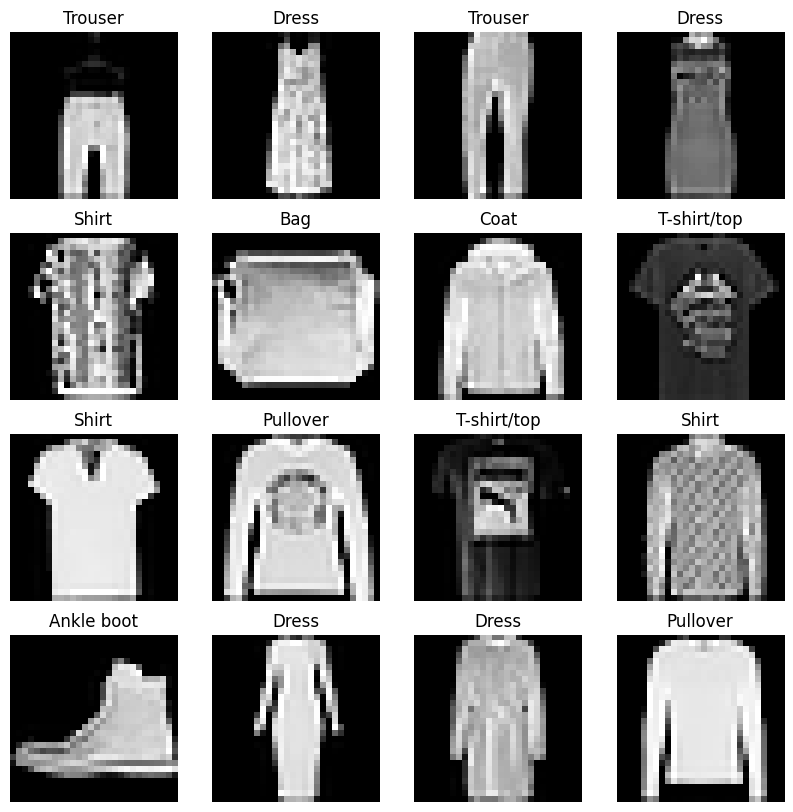

In [ ]:
# Visualize some sample images
FMNIST_Labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(np.array(df.iloc[i, 1:]).reshape(28, 28), cmap='gray')
    plt.title(f"{FMNIST_Labels[df.iloc[i, 0]]}")
    plt.axis('off')

plt.show()

In [ ]:
y_1 = df_1['label']
df_1 = df_1.drop(columns='label')
df_1 = df_1/255.0

Euclidean Distance Kmeans

In [ ]:
def centroid(x,k):
  centroids = []
  for i in range(k):
    a = x[i]
    centroids.append(a)
  return centroids

def assign(x,k,cen):
  member = np.zeros([len(x),1])
  for i in range(len(x)):
    point_1 = x[i]
    dist = []
    for j in range(k):

      point_2 = cen[j]
      d  = np.linalg.norm(point_1 - point_2)
      dist.append(d)
    a = np.argsort(dist)
    member[i] = a[0]
  return member

def update(x,k,member):
  m=np.array(member)
  u=np.unique(m)
  cen = []
  for j in range(len(u)):
    mean = 0
    count = 0
    sum = 0
    for i in range(len(m)):
      if(m[i]==u[j]):
       sum = sum + x[i]
       count = count + 1
    mean = sum/count
    cen.append(mean)
  new_mem = assign(x,k,cen)
  return new_mem

def algo(x,k,iter):
  x = np.array(x)
  length = len(x)
  cen = centroid(x,k)
  members = assign(x,k,cen)
  for i in range(iter):
    members = update(x,k,members)
  return members

In [ ]:
dim = algo(df_1,3,100)

Cosine Distance

In [ ]:
#cosine similarity
def centroid(x,k):
  centroids = []
  for i in range(k):
    a = x[i]
    centroids.append(a)
  return centroids

def assign(x,k,cen):
  member = np.zeros([len(x),1])
  for i in range(len(x)):
    point_1 = x[i]
    dist = []
    for j in range(k):
      from scipy.spatial import distance
      point_2 = cen[j]
      d  = distance.cosine(point_1,point_2)
      dist.append(d)
    a = np.argsort(dist)
    member[i] = a[0]
  return member

def update(x,k,member):
  m=np.array(member)
  u=np.unique(m)
  cen = []
  for j in range(len(u)):
    mean = 0
    count = 0
    sum = 0
    for i in range(len(m)):
      if(m[i]==u[j]):
       sum = sum + x[i]
       count = count + 1
    mean = sum/count
    cen.append(mean)
  new_mem = assign(x,k,cen)
  return new_mem

def algo(x,k,iter):
  x = np.array(x)
  length = len(x)
  cen = centroid(x,k)
  members = assign(x,k,cen)
  for i in range(iter):
    members = update(x,k,members)
  return members

In [ ]:
cluster_cos = algo(df_1,3,100)


#all components with clusters 10,6 and 4

Cosine

In [ ]:
cluster = [10,6,4]
clus = []
for i in range(len(cluster)):
  labels = algo(df_1,cluster[i],100)
  clus.append(labels)




In [ ]:
normalized_mutual_info_score(y_1,np.squeeze(clus[0]))

0.6307470291978244

In [ ]:
normalized_mutual_info_score(y_1,np.squeeze(clus[1]))

0.5443387874783755

In [ ]:
normalized_mutual_info_score(y_1,np.squeeze(clus[2]))

0.4838469395082604

Euclidean

In [ ]:
def centroid(x,k):
  centroids = []
  for i in range(k):
    a = x[i]
    centroids.append(a)
  return centroids

def assign(x,k,cen):
  member = np.zeros([len(x),1])
  for i in range(len(x)):
    point_1 = x[i]
    dist = []
    for j in range(k):

      point_2 = cen[j]
      d  = np.linalg.norm(point_1 - point_2)
      dist.append(d)
    a = np.argsort(dist)
    member[i] = a[0]
  return member

def update(x,k,member):
  m=np.array(member)
  u=np.unique(m)
  cen = []
  for j in range(len(u)):
    mean = 0
    count = 0
    sum = 0
    for i in range(len(m)):
      if(m[i]==u[j]):
       sum = sum + x[i]
       count = count + 1
    mean = sum/count
    cen.append(mean)
  new_mem = assign(x,k,cen)
  return new_mem

def algo(x,k,iter):
  x = np.array(x)
  length = len(x)
  cen = centroid(x,k)
  members = assign(x,k,cen)
  for i in range(iter):
    members = update(x,k,members)
  return members







In [ ]:
cluster = [10,6,4]
scores = []
for i in range(len(cluster)):
  mem = algo(df_1,cluster[i],100)
  sc = normalized_mutual_info_score(y_1,np.squeeze(mem))
  scores.append(sc)


In [ ]:
print(scores)

[0.4895084570110479, 0.46021938368344895, 0.40801025762002735]


# For 32 components

In [ ]:
pca = PCA(n_components=32)
x_32 =   pca.fit_transform(df_1)


Euclidean (32 components)

In [ ]:
cluster = [10,6,4]
scores = []
for i in range(len(cluster)):
  mem = algo(x_32,cluster[i],100)
  sc = normalized_mutual_info_score(y_1,np.squeeze(mem))
  scores.append(sc)

In [ ]:
print(scores)

[0.49014106159888904, 0.46817080123309235, 0.4037965601626884]


Cosine (32 components)

In [ ]:
#cosine similarity
def centroid(x,k):
  centroids = []
  for i in range(k):
    a = x[i]
    centroids.append(a)
  return centroids

def assign(x,k,cen):
  member = np.zeros([len(x),1])
  for i in range(len(x)):
    point_1 = x[i]
    dist = []
    for j in range(k):
      from scipy.spatial import distance
      point_2 = cen[j]
      d  = distance.cosine(point_1,point_2)
      dist.append(d)
    a = np.argsort(dist)
    member[i] = a[0]
  return member

def update(x,k,member):
  m=np.array(member)
  u=np.unique(m)
  cen = []
  for j in range(len(u)):
    mean = 0
    count = 0
    sum = 0
    for i in range(len(m)):
      if(m[i]==u[j]):
       sum = sum + x[i]
       count = count + 1
    mean = sum/count
    cen.append(mean)
  new_mem = assign(x,k,cen)
  return new_mem

def algo(x,k,iter):
  x = np.array(x)
  length = len(x)
  cen = centroid(x,k)
  members = assign(x,k,cen)
  for i in range(iter):
    members = update(x,k,members)
  return members

In [ ]:
cluster = [10,6,4]
scores = []
for i in range(len(cluster)):
  mem = algo(x_32,cluster[i],100)
  sc = normalized_mutual_info_score(y_1,np.squeeze(mem))
  scores.append(sc)




In [ ]:
print(scores)

[0.5053093051646951, 0.4380780911302456, 0.4024091148414831]


#kmeans from Library

In [ ]:
kmeans_10 = KMeans(n_clusters=10, random_state=0, n_init="auto").fit_predict(df_1)
kmeans_6 = KMeans(n_clusters=6, random_state=0, n_init="auto").fit_predict(df_1)
kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init="auto").fit_predict(df_1)

In [ ]:
normalized_mutual_info_score(y_1,kmeans_10)

0.5450076152226851

In [ ]:
normalized_mutual_info_score(y_1,kmeans_6)

0.49194440219575314

In [ ]:
normalized_mutual_info_score(y_1,kmeans_4)

0.3791644670937024

In [ ]:
pca = PCA(n_components=2)
x =   pca.fit_transform(df_1)

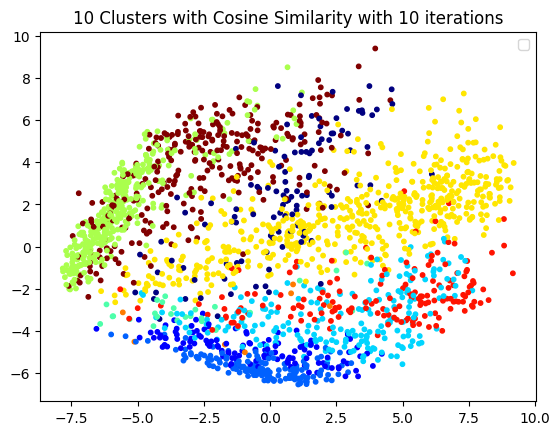

In [ ]:
i_10 = algo(df_1,10,10)
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(i_10), cmap='jet', s=10)
plt.title(f'10 Clusters with Cosine Similarity with 10 iterations')
plt.legend()

plt.show()

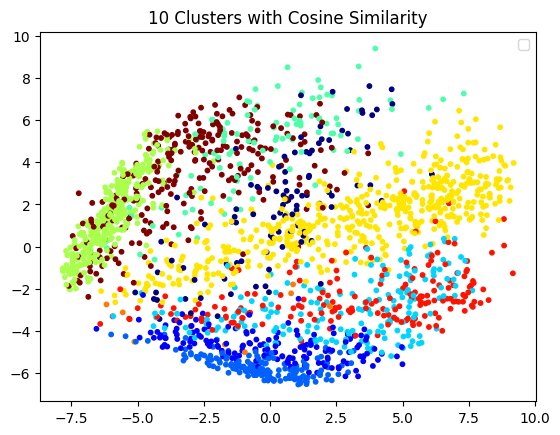

In [ ]:
#10 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(clus[0]), cmap='jet', s=10)
plt.title(f'10 Clusters with Cosine Similarity')
plt.legend()

plt.show()

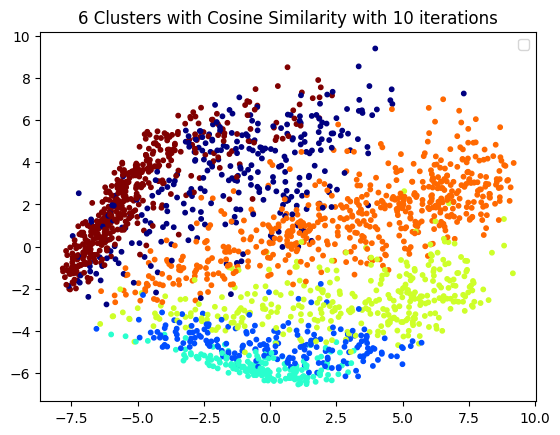

In [ ]:
i_6 = algo(df_1,6,10)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(i_6), cmap='jet', s=10)
plt.title(f'6 Clusters with Cosine Similarity with 10 iterations')
plt.legend()

plt.show()

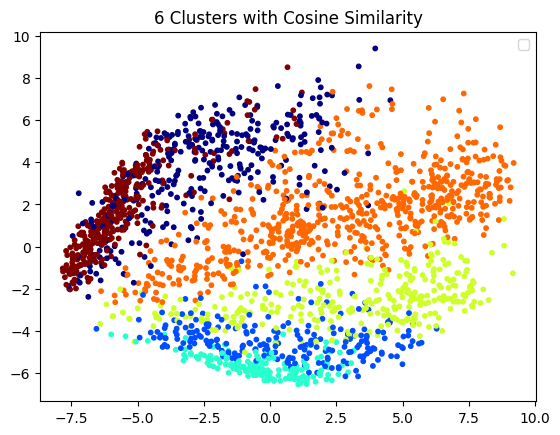

In [ ]:
#6 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(clus[1]), cmap='jet', s=10)
plt.title(f'6 Clusters with Cosine Similarity')
plt.legend()

plt.show()

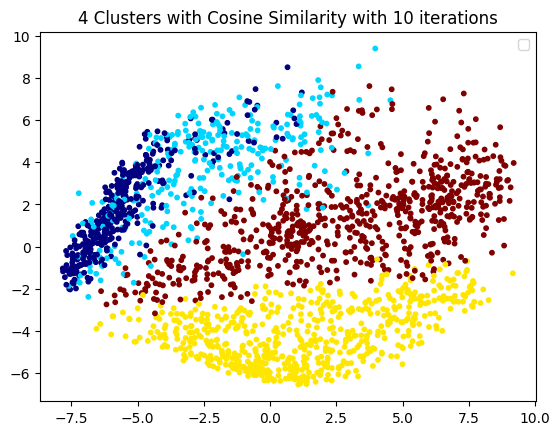

In [ ]:
i_4 = algo(df_1,4,10)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(i_4), cmap='jet', s=10)
plt.title(f'4 Clusters with Cosine Similarity with 10 iterations')
plt.legend()

plt.show()

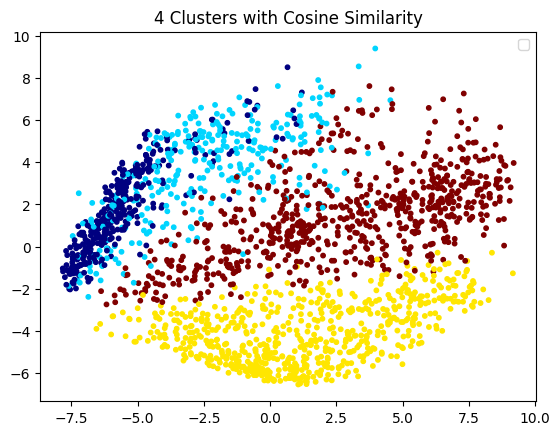

In [ ]:
#4 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(clus[2]), cmap='jet', s=10)
plt.title(f'4 Clusters with Cosine Similarity')
plt.legend()

plt.show()

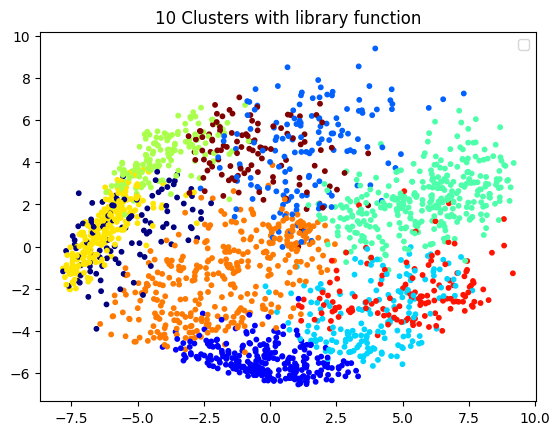

In [ ]:
#10 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(kmeans_10), cmap='jet', s=10)
plt.title(f'10 Clusters with library function')
plt.legend()

plt.show()

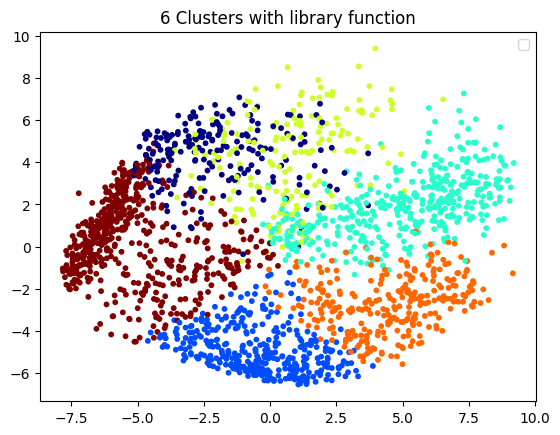

In [ ]:
#6 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(kmeans_6), cmap='jet', s=10)
plt.title(f'6 Clusters with library function')
plt.legend()

plt.show()

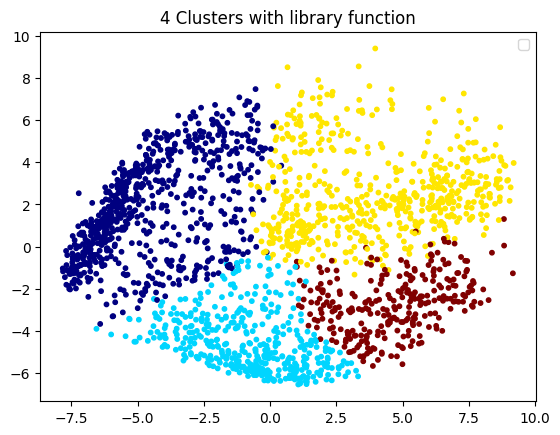

In [ ]:
#4 clusters (cosine similarity)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(kmeans_4), cmap='jet', s=10)
plt.title(f'4 Clusters with library function')
plt.legend()

plt.show()

#TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(df_1)

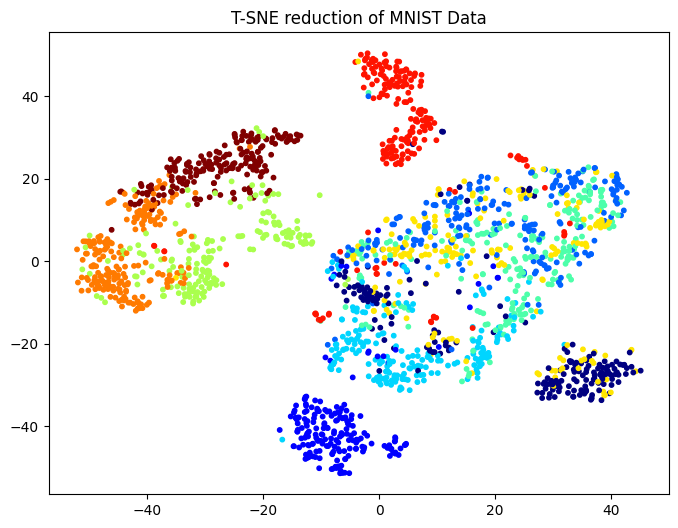

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_1, cmap='jet', s=10)
plt.title('T-SNE reduction of MNIST Data')
plt.show()

In [ ]:
kmeans_tsne = KMeans(n_clusters=10, random_state=69, n_init=100)
labels_tsne = kmeans_tsne.fit_predict(x_tsne)
NMI_tsne = normalized_mutual_info_score(y_1, labels_tsne)
print(f"NMI for K-Means with 10 Clusters on T-SNE reduced Data: {NMI_tsne}")

NMI for K-Means with 10 Clusters on T-SNE reduced Data: 0.5901229649949414
